c:\Users\jakob\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
c:\Users\jakob\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


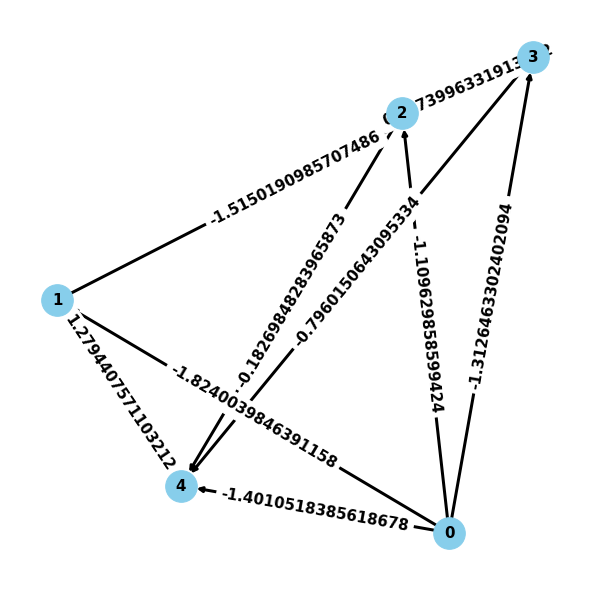

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product
from pyvis.network import Network

from DAG import DAG

dag = DAG(n = 5, roots = 1, strength=2, precalculate_paths = True)
dag.plot()

In [20]:
dag.get_varsortability(analytical=True)

{'analytical': 0.9230769230769231}

0.6878464737055737

In [12]:
# dag.precalculate_paths = False
from time import time
t = time()
sim = dag.get_simulated_var(100000)
print("time:", time() - t)
t = time()
ana = dag.get_analytical_var()
print("time:", time() - t)

for i in range(dag.size):
    print("simulated", i, ":",round(sim[i]), "| analytical", ":", round(ana[i]))

print("")
varsort = dag.get_varsortability(analytical = True, simulated = True, N = 100000)
print("varsortability:", varsort)

time: 0.12483930587768555
time: 17.275866746902466
simulated 0 : 1 | analytical : 1
simulated 1 : 2 | analytical : 2
simulated 2 : 5 | analytical : 5
simulated 3 : 42 | analytical : 42
simulated 4 : 232 | analytical : 230
simulated 5 : 6 | analytical : 6
simulated 6 : 930 | analytical : 921
simulated 7 : 2480 | analytical : 2455
simulated 8 : 9059 | analytical : 8968
simulated 9 : 115241 | analytical : 114089
simulated 10 : 28948 | analytical : 28660
simulated 11 : 1038738 | analytical : 1028378
simulated 12 : 966751 | analytical : 957098
simulated 13 : 12955572 | analytical : 12826260
simulated 14 : 45700085 | analytical : 45243778

varsortability: {'analytical': 1.0, 'simulated': 1.0}


$V_a = \sum^{nodes}_i\sum_{j,k}\prod^{path_{j}}_j\prod^{path_{ia}}_k W_j W_kV_i + V_a$

In [18]:
# genetic algorithm

start_adj = np.array([[0,1,0,1],[0,0,1,1],[0,0,0,1],[0,0,0,0]]).astype(float)

start_dags = [DAG(n = 4, roots = 1, strength=2, precalculate_paths = False, adjacency_matrix = start_adj) for _ in range(11)]


for i in range(20):
    print("")
    print("generation", i)
    start_dags = sorted(start_dags, key = lambda x: x.get_continous_varsortability(analytical = False, simulated = True, N = 100000)["simulated"], reverse = False)
    start_dags = start_dags[:5]
    for j in range(5):
        start_dags.append(start_dags[j].mutate())

    new = DAG(n = 4, roots = 1, strength=2, precalculate_paths = False, adjacency_matrix = start_adj)
    start_dags.append(new.mutate())

    for j in range(1):
        print("varsortability:", start_dags[j].get_varsortability(analytical = False, simulated = True, N = 100000))
        print("continous_varsortability:", start_dags[j].get_continous_varsortability(analytical = False, simulated = True, N = 100000)["simulated"])



generation 0
varsortability: {'simulated': 1.0}
continous_varsortability: 7.841296238391104

generation 1
varsortability: {'simulated': 0.5555555555555556}
continous_varsortability: 2.513897363824943

generation 2
varsortability: {'simulated': 0.5555555555555556}
continous_varsortability: 2.536362710000425

generation 3
varsortability: {'simulated': 0.5555555555555556}
continous_varsortability: 2.5144984210607735

generation 4
varsortability: {'simulated': 0.5555555555555556}
continous_varsortability: 2.5294115659686085

generation 5
varsortability: {'simulated': 0.5555555555555556}
continous_varsortability: 2.5360997148621696

generation 6
varsortability: {'simulated': 0.5555555555555556}
continous_varsortability: 2.531071742219569

generation 7
varsortability: {'simulated': 0.5555555555555556}
continous_varsortability: 2.5336335037019984

generation 8
varsortability: {'simulated': 0.5555555555555556}
continous_varsortability: 2.5126246130476138

generation 9
varsortability: {'simula

In [82]:
# Gradient descent
from scipy.optimize import minimize
from tqdm.notebook import tqdm  

start_adj = np.array([[0,1,0,1],[0,0,1,1],[0,0,0,1],[0,0,0,0]]).astype(float)

def f(x):
    ad = np.zeros_like(start_adj)
    ad[start_adj == 1] = x
    d = DAG(n = 4, roots = 1, strength=2, precalculate_paths = False, adjacency_matrix = ad)
    return d.get_continous_varsortability(analytical = False, simulated = True, N = 1000000)["simulated"]


_min = 1000
x0 = np.ones(np.sum(start_adj == 1))
best = x0
for i in tqdm(range(50)):
    res = minimize(f, x0, bounds = [(-2,2) for i in range(len(x0))], options={'disp': True, 'eps': 0.001, 'ftol': 1e-13, 'gtol': 1e-13, 'maxiter' : 10000, 'maxfun' : 1000})
    if (res.fun < _min):
        _min = res.fun
        print(res.fun)
        best = res.x

  0%|          | 0/50 [00:00<?, ?it/s]

2.514035807797626
2.3228225948337644
2.043910581660168
1.564326114052921


KeyboardInterrupt: 

In [84]:
ad

array([[ 0.        ,  2.        ,  0.        ,  0.89109822],
       [ 0.        ,  0.        ,  0.51998386, -0.14669511],
       [ 0.        ,  0.        ,  0.        , -0.38034673],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

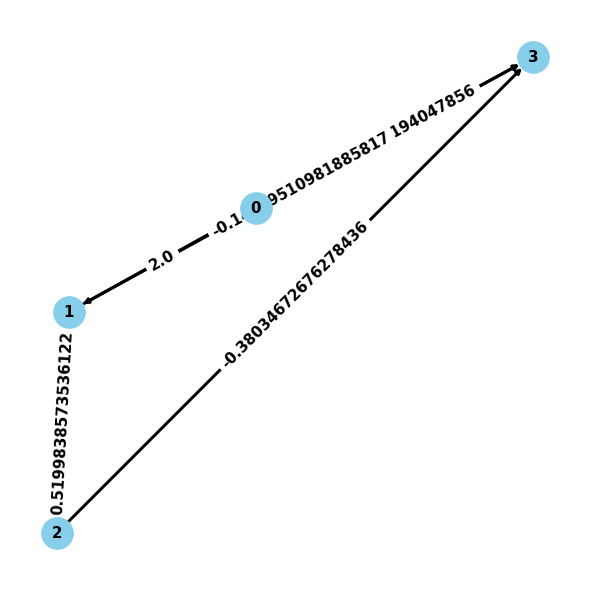

{'analytical': 0.5555555555555556, 'simulated': 0.5555555555555556}
{'analytical': 1.5656788357743034, 'simulated': 1.5699699811931658}


In [83]:
ad = np.zeros_like(start_adj)
ad[start_adj == 1] = np.array(best)

dag = DAG(n = 5, roots = 1, strength=2, precalculate_paths = False, adjacency_matrix = ad)
dag.plot()

print(dag.get_varsortability(analytical=True, simulated=True, N = 100000))

print(dag.get_continous_varsortability(analytical = True, simulated = True, N = 1000000))